In [1]:
import pandas as pd
import random
import statistics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
random.seed(0)

In [3]:
def estimate_num_tanks_from_single_part(evidence, part_rank):
    """
    Given a series of serial numbers discovered, use the specified single serial number
    to estimate N, the total number of tanks.
    
    evidence: an array of discovered serial numbers
    part_rank: an index into evidence, indicating which discovered part to use for the estimate
    """
    
    num_parts = len(evidence)
    estimate = (evidence[part_rank] * (num_parts + 1) / part_rank) - 1
    return estimate    

In [4]:
def test_estimation(ranks_tested, aggregate_estimates="", cap_estimates=True, use_gaps=False, show_plots=True):
    """
    Run one experiment, picking the true number of tanks, estimating this value in the specfied manner, and returning
    the estimate's accuracy. 
    
    ranks_tested: an array representing the ranks of the parts used for the estimate. This must be some subset
        of the full array betwen 0 and 99
    aggregate_estimates: if multiple parts are used to estimate the number of tanks, this specifies how they are 
        aggregated into a single estimate
    cap_estimates: if True, any estimates lower than the max will be removed
    show_plots: if True, plots presenting the true number of tanks and the estimates will be displayed.
    """    
    
    # Determine the number of tanks actually built
    num_tanks = random.randint(1000, 20000)
    
    # Determine the set of serial numbers discovered
    evidence = sorted(random.choices(range(num_tanks), k=100))
    
    if use_gaps:
        evidence_series = pd.Series(evidence)
        gaps = evidence_series.diff()[1:]
        avg_gap = gaps.mean()
        estimate = evidence[-1] + avg_gap
        estimates_arr = [estimate]
    else:
        estimates_arr = []
        for i in ranks_tested:
            estimate = estimate_num_tanks_from_single_part(evidence, i)
            if (cap_estimates == False) or (estimate >= max(evidence)):
                estimates_arr.append(estimate)

        estimate = None
        if aggregate_estimates == "mean":
            estimate = statistics.mean(estimates_arr) 
        elif aggregate_estimates == "median":
            estimate = statistics.median(estimates_arr) 
        elif len(estimates_arr) == 1:
            estimate = estimates_arr[0]
        
    if show_plots:    
        fig, ax = plt.subplots(figsize=(15, 2))
        s = sns.scatterplot(x=evidence, y=[0]*len(evidence))
        s.axvline(num_tanks, color='red', ymin=0.0, ymax=1.0)

        if aggregate_estimates == "mean":
            s.axvline(estimate, color='green', alpha=1.0)
        elif aggregate_estimates == "median":
            s.axvline(estimate, color='green', alpha=1.0)
        else:        
            for e in estimates_arr:
                alpha = 1.0
                if len(ranks_tested) >= 10:
                    alpha = 0.1
                s.axvline(e, color='green', alpha=alpha)

        s.set_yticks([])
        plt.show()
    
    if estimate:
        estimate_err = (abs(num_tanks - estimate)) / num_tanks
    else:
        estimate_err = None
    return estimate_err 

## Using the Average Gap

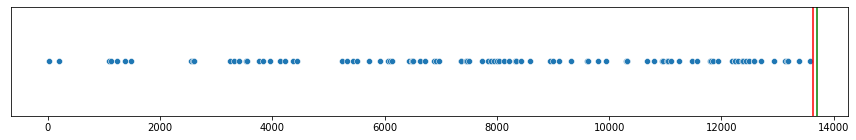

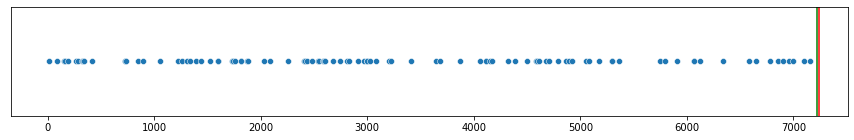

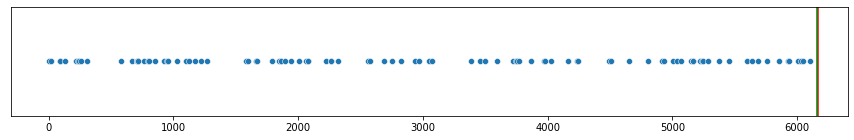

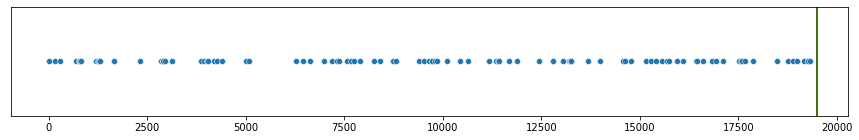

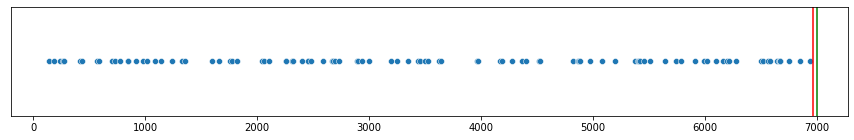

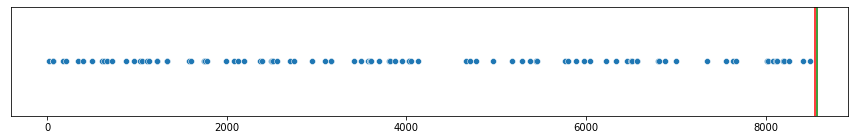

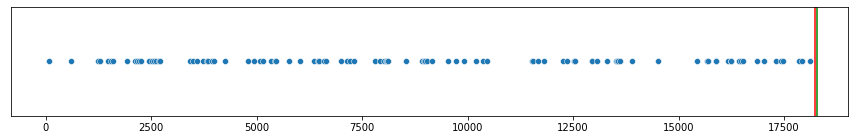

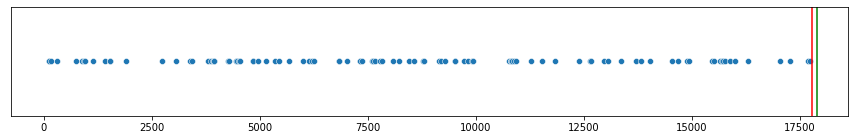

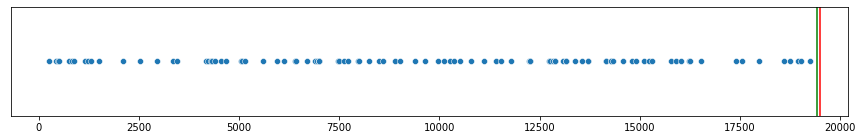

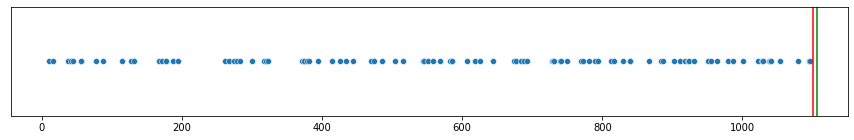

Median error: 0.0031335829799463977


In [5]:
errs = []
for _ in range(10):
    errs.append(test_estimation([99], use_gaps=True))
print(f"Median error: {statistics.median(errs)}")

## Using only the max value found

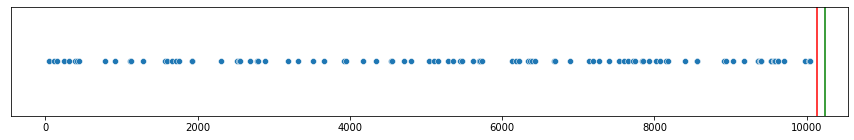

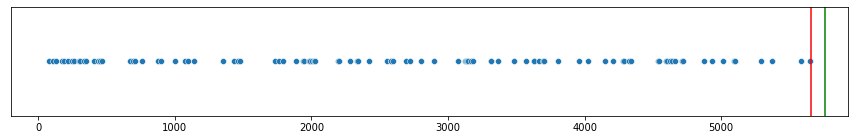

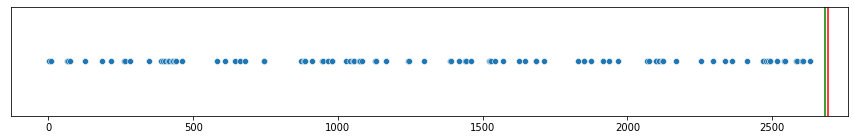

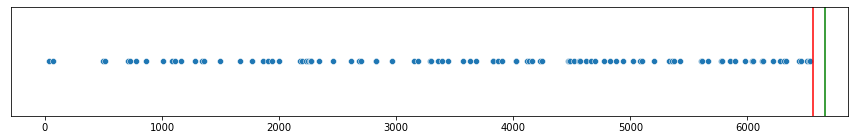

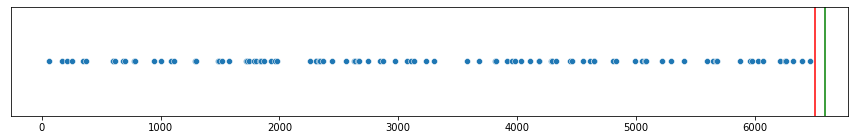

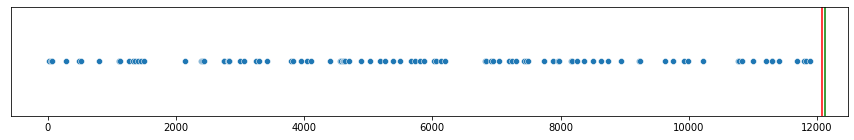

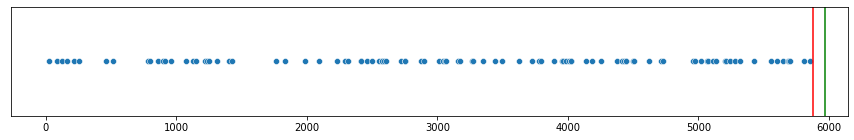

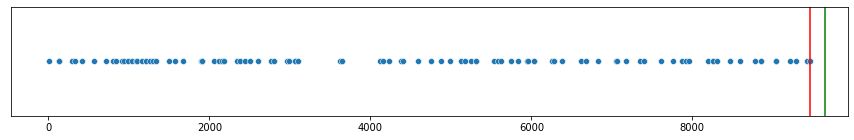

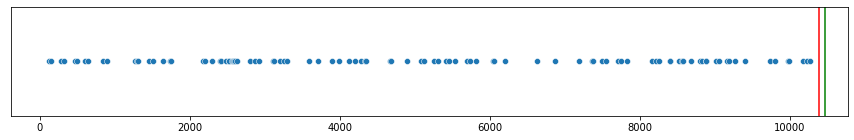

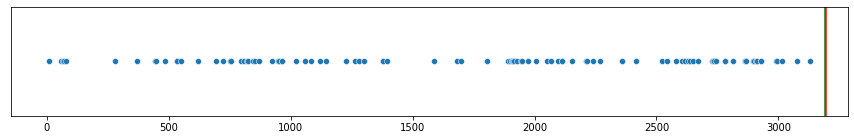

Median error: 0.012178585369877712


In [6]:
errs = []
for _ in range(10):
    errs.append(test_estimation([99]))
print(f"Median error: {statistics.median(errs)}")

## Using all parts found

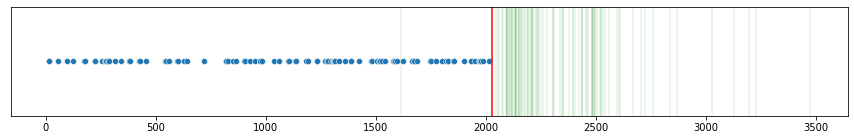

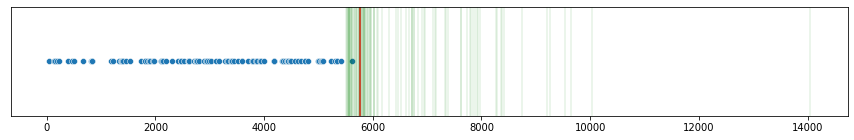

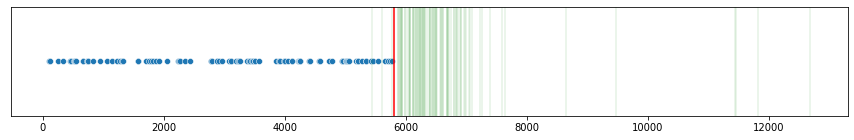

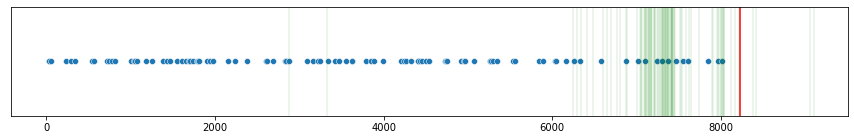

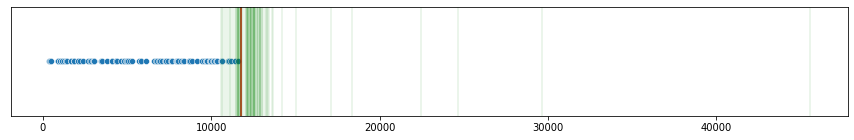

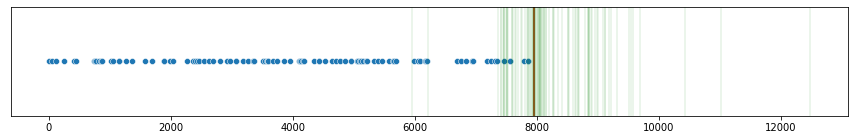

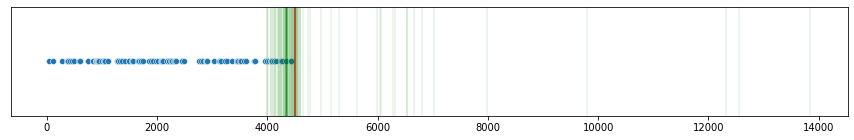

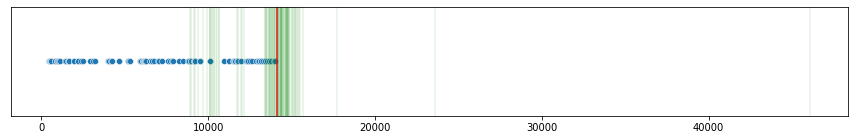

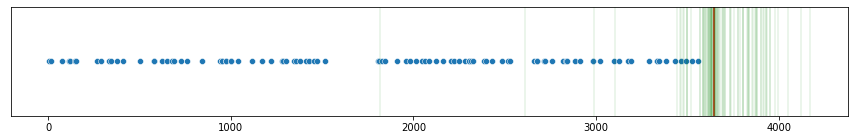

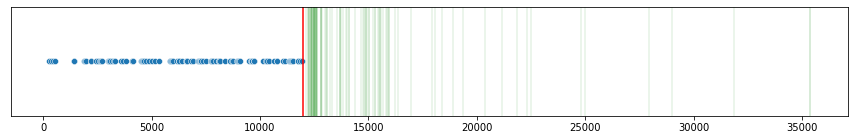

In [7]:
for _ in range(10):
    test_estimation(range(1, 99), cap_estimates=False)

## Using the first 10 parts found

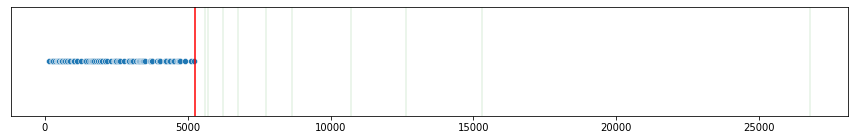

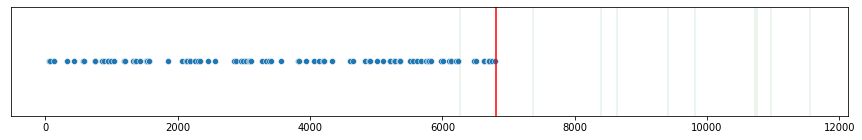

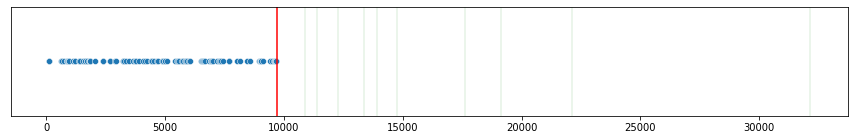

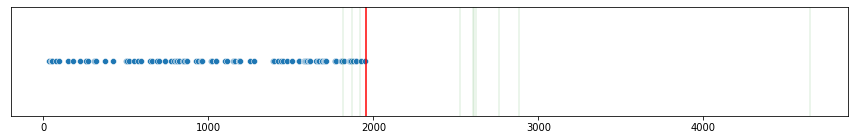

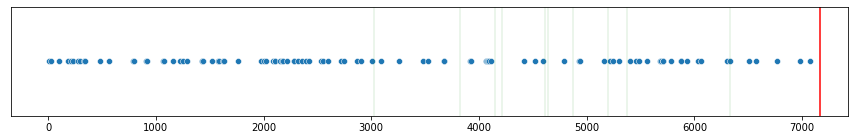

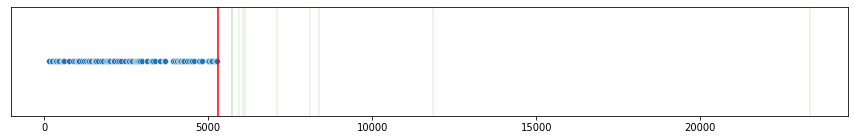

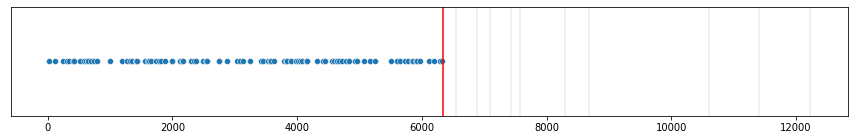

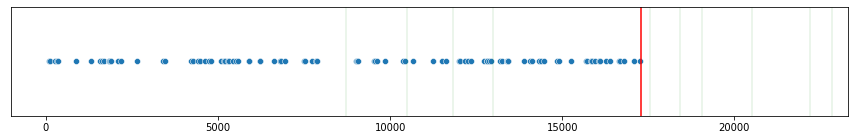

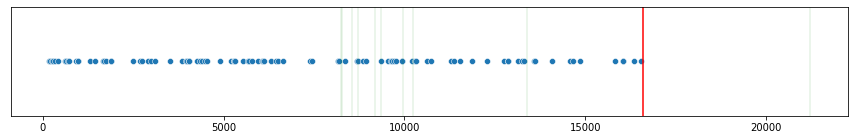

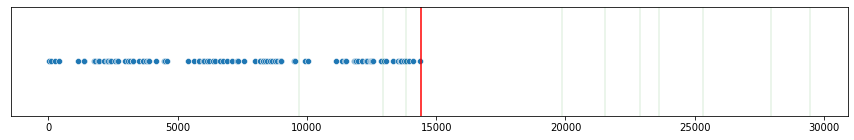

In [8]:
for _ in range(10):
    test_estimation(range(1, 11), cap_estimates=False)

## Using the middle 10 parts found

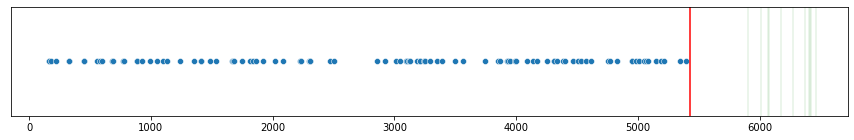

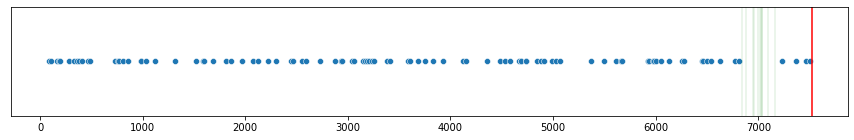

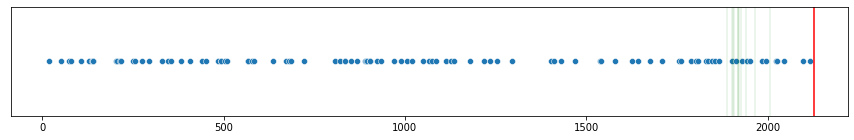

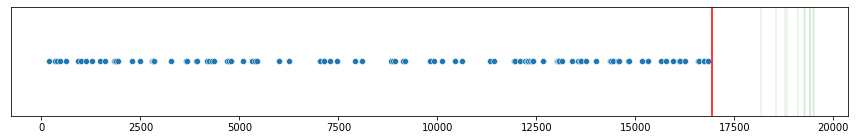

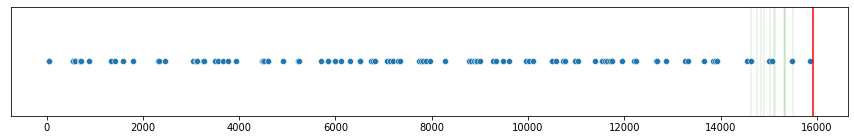

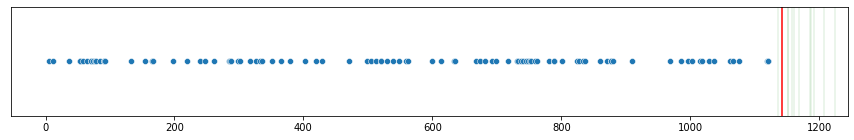

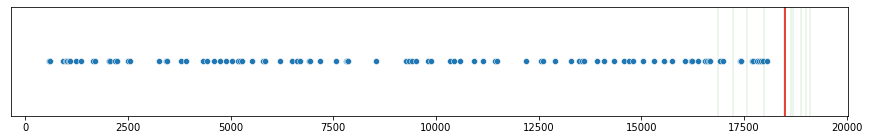

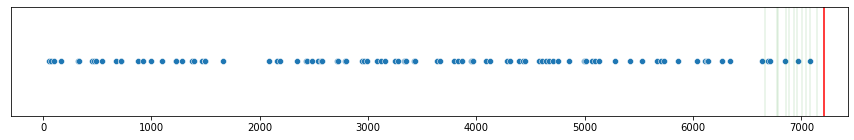

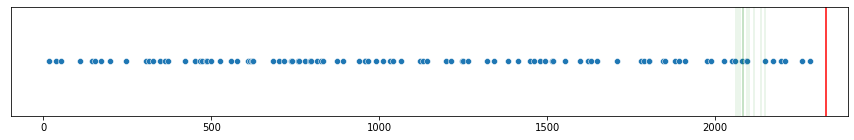

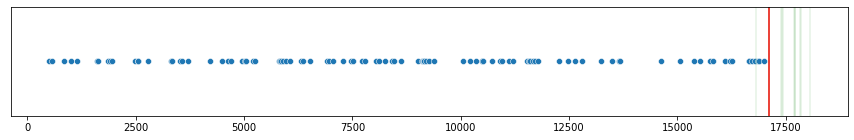

In [9]:
# Note: they tend to all under-estimate or all over-estimate the true number of tanks. 

for _ in range(10):
    test_estimation(range(45, 56), cap_estimates=False)

## Using the last 10 parts found

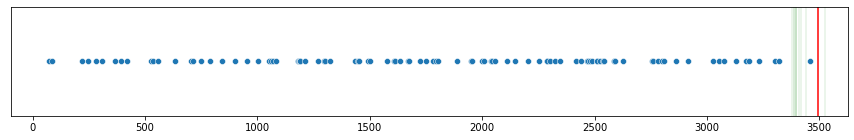

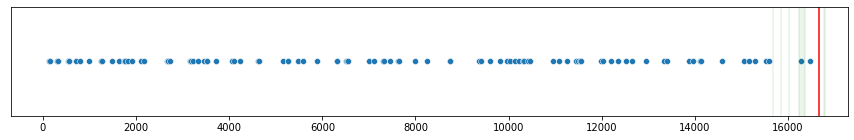

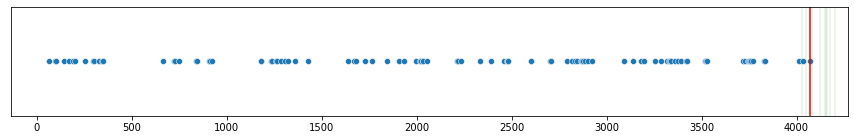

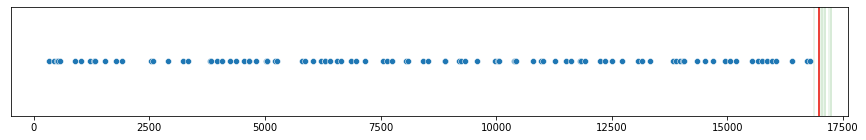

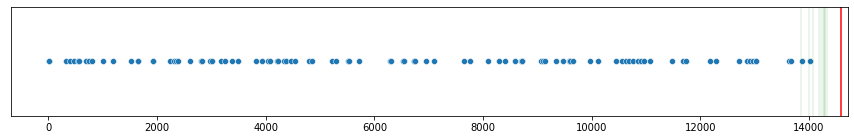

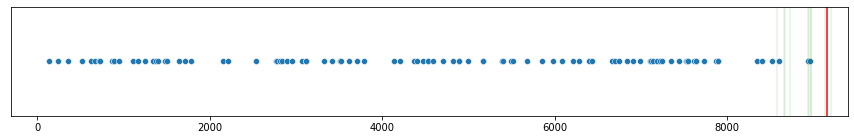

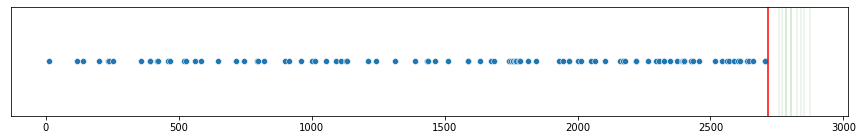

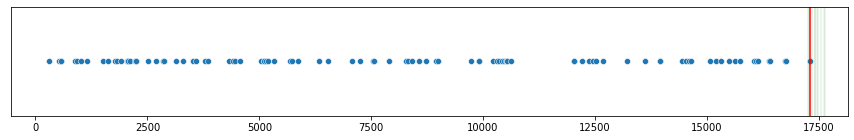

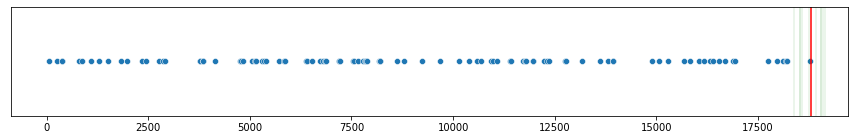

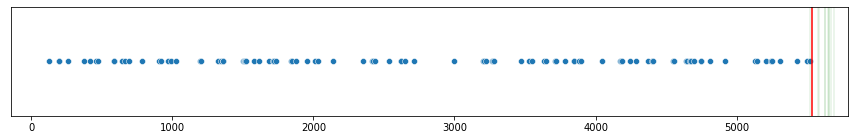

In [10]:
for _ in range(10):
    test_estimation(range(90, 100), cap_estimates=False)

## Using the Mean of all Parts Found

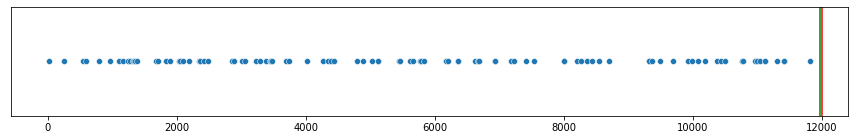

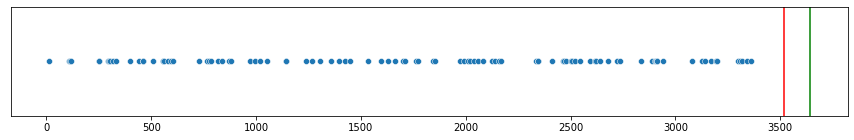

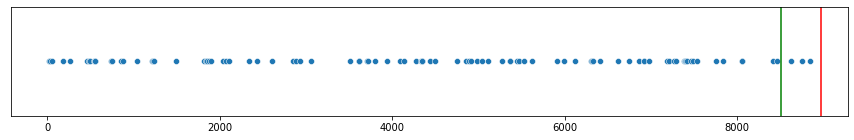

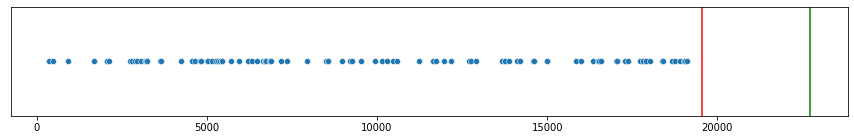

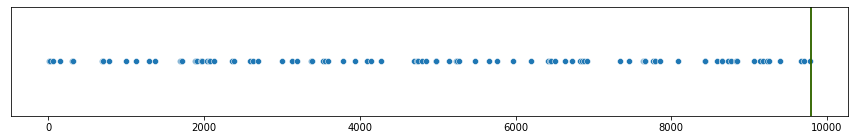

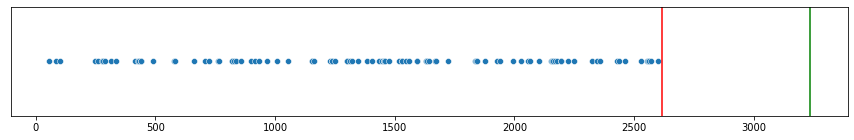

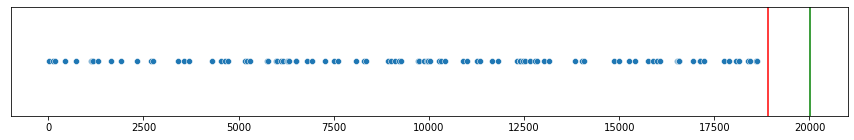

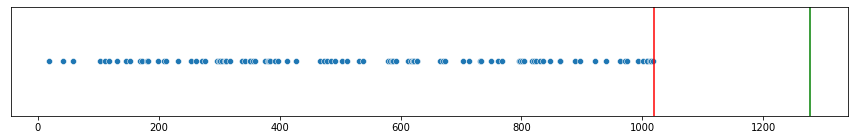

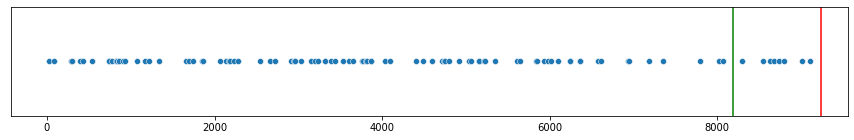

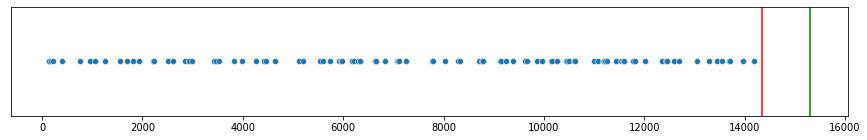

Median error: 0.062376447828051615


In [11]:
errs = []
for _ in range(10):
    errs.append(test_estimation(range(1, 99), aggregate_estimates="mean", cap_estimates=False))
print(f"Median error: {statistics.median(errs)}")

## Using the Median of all Parts Found

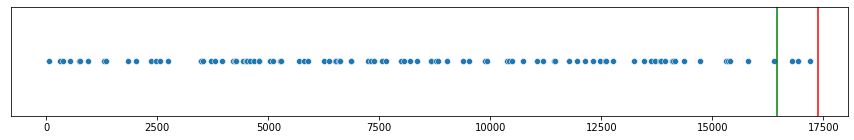

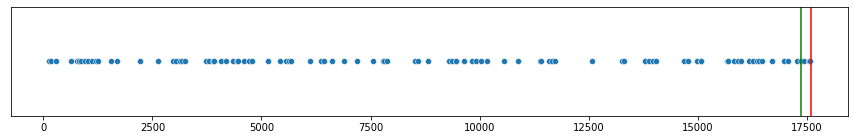

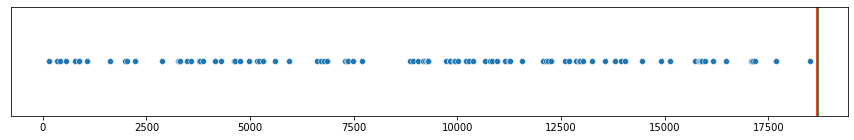

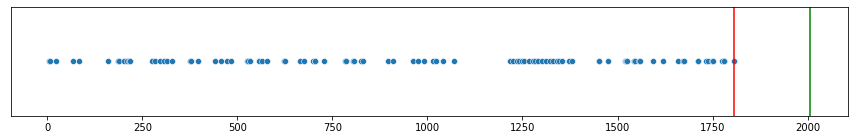

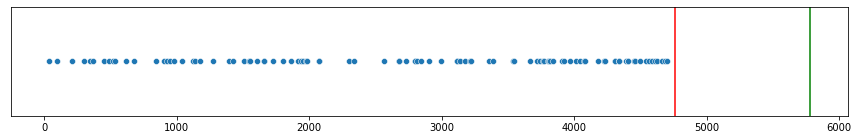

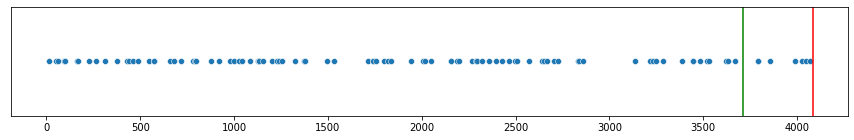

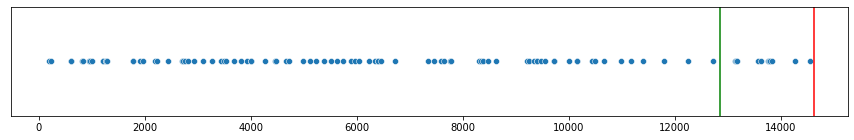

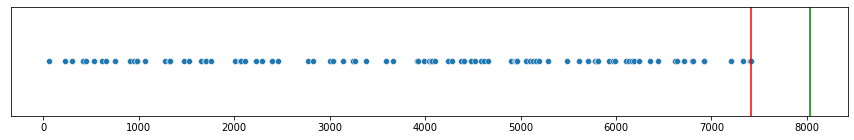

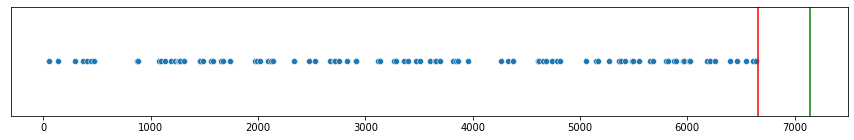

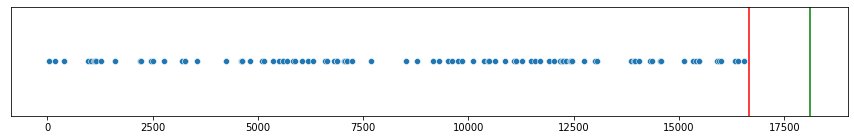

Median error: 0.08464852782177655


In [12]:
errs = []
for _ in range(10):
    errs.append(test_estimation(range(1, 99), aggregate_estimates="median", cap_estimates=False))
print(f"Median error: {statistics.median(errs)}")    

## Using the Mean of the Last 10 Parts Found

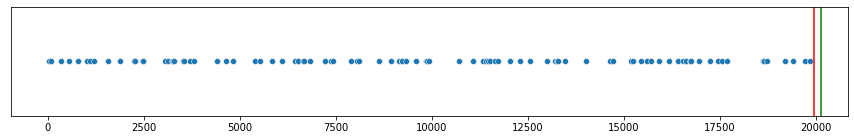

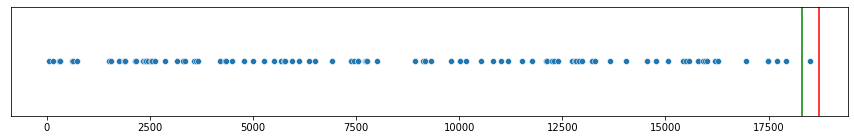

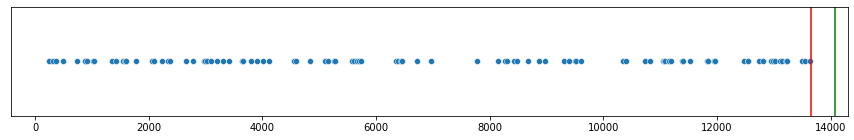

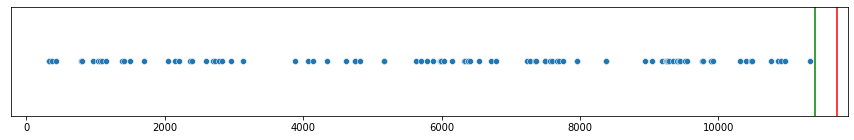

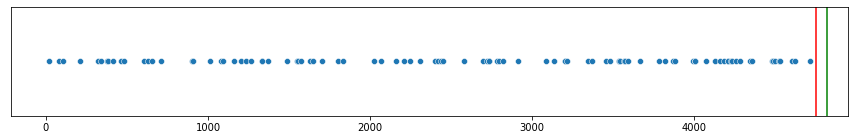

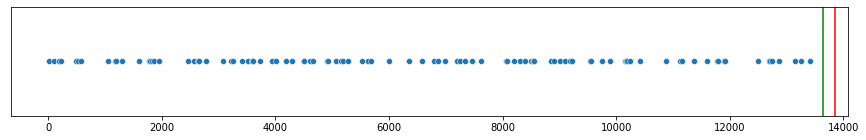

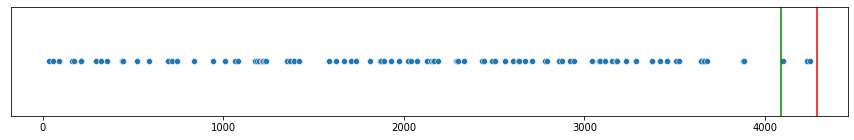

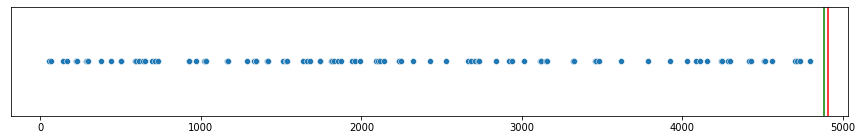

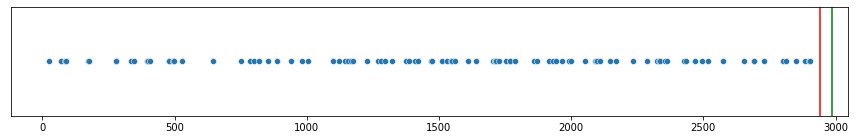

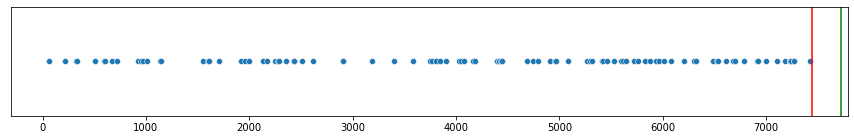

Median error: 0.018775911057308803


In [13]:
errs = []
for _ in range(10):
    errs.append(test_estimation(range(90, 100), aggregate_estimates="median", cap_estimates=False))
print(f"Median error: {statistics.median(errs)}")    

## Using the Median of the Last 10 Parts Found

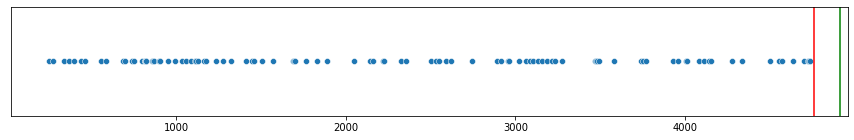

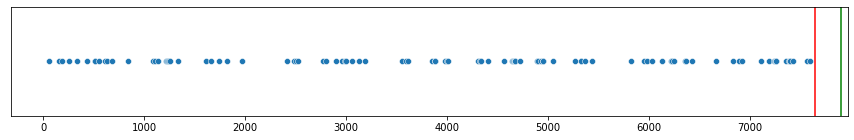

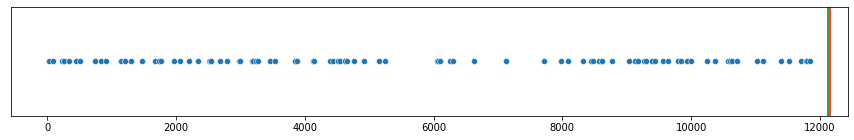

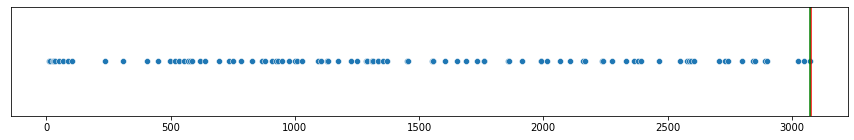

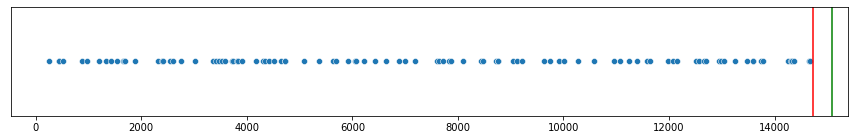

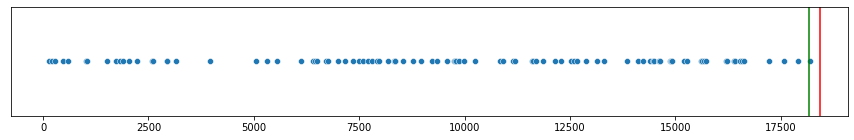

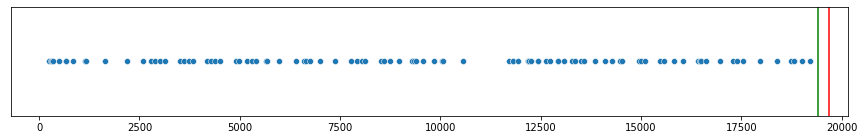

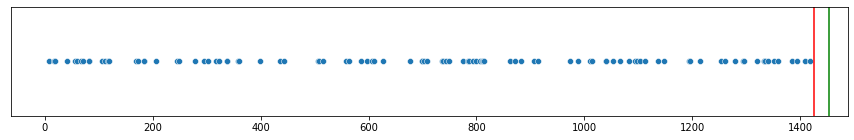

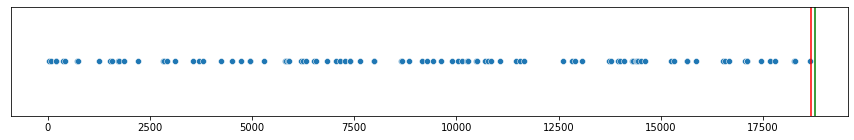

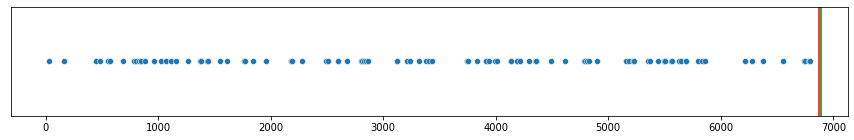

Median error: 0.014099993625401687


In [14]:
errs = []
for _ in range(10):
    errs.append(test_estimation(range(90, 100), aggregate_estimates="median", cap_estimates=False))
print(f"Median error: {statistics.median(errs)}")    

## Repeating without plots, using a large number of trials

In [15]:
results_arr = []
for i in range(100_000):
    if i > 0 and i % 5000 == 0:
        print(f"Trial: {i:,}")
    row_arr = []
    row_arr.append(test_estimation([99],          aggregate_estimates="",       show_plots=False))
    row_arr.append(test_estimation(range(90,100), cap_estimates=False,                               show_plots=False, use_gaps=True))
    
    row_arr.append(test_estimation(range(1,100),  aggregate_estimates="mean",   show_plots=False))
    row_arr.append(test_estimation(range(1,100),  aggregate_estimates="median", show_plots=False))
    row_arr.append(test_estimation(range(95,100), aggregate_estimates="mean",   show_plots=False))
    row_arr.append(test_estimation(range(95,100), aggregate_estimates="median", show_plots=False))
    row_arr.append(test_estimation(range(90,100), aggregate_estimates="mean",   show_plots=False))
    row_arr.append(test_estimation(range(90,100), aggregate_estimates="median", show_plots=False))

    row_arr.append(test_estimation(range(1,100),  aggregate_estimates="mean",   cap_estimates=True, show_plots=False))
    row_arr.append(test_estimation(range(1,100),  aggregate_estimates="median", cap_estimates=True, show_plots=False))
    row_arr.append(test_estimation(range(95,100), aggregate_estimates="mean",   cap_estimates=True, show_plots=False))
    row_arr.append(test_estimation(range(95,100), aggregate_estimates="median", cap_estimates=True, show_plots=False))
    row_arr.append(test_estimation(range(90,100), aggregate_estimates="mean",   cap_estimates=True, show_plots=False))
    row_arr.append(test_estimation(range(90,100), aggregate_estimates="median", cap_estimates=True, show_plots=False))
    
    results_arr.append(row_arr)

results_df = pd.DataFrame(results_arr, columns=[
    'Max Part', 
    'Avg Gaps',
    
    'Mean all Parts', 
    'Median all Parts',
    'Mean last 5 Parts', 
    'Median last 5 Parts',
    'Mean last 10 Parts', 
    'Median last 10 Parts',
    
    'Mean all Parts Capped', 
    'Median all Parts Capped',
    'Mean last 5 Parts Capped', 
    'Median last 5 Parts Capped',
    'Mean last 10 Parts Capped', 
    'Median last 10 Parts Capped',
])

results_df.head()
avgs = results_df.median(axis=0)   

Trial: 5,000
Trial: 10,000
Trial: 15,000
Trial: 20,000
Trial: 25,000
Trial: 30,000
Trial: 35,000
Trial: 40,000
Trial: 45,000
Trial: 50,000
Trial: 55,000
Trial: 60,000
Trial: 65,000
Trial: 70,000
Trial: 75,000
Trial: 80,000
Trial: 85,000
Trial: 90,000
Trial: 95,000


In [16]:
avgs_df = pd.DataFrame({"Averages":avgs})
avgs_df

,Averages
Max Part,0.013625
Avg Gaps,0.006285
Mean all Parts,0.105750
Median all Parts,0.047667
Mean last 5 Parts,0.014852
Median last 5 Parts,0.015186
Mean last 10 Parts,0.016374
Median last 10 Parts,0.016419
Mean all Parts Capped,0.105725
Median all Parts Capped,0.047711


In [17]:
# View sorted from best to worst

avgs_df.sort_values('Averages')

,Averages
Avg Gaps,0.006285
Max Part,0.013625
Mean last 5 Parts,0.014852
Mean last 5 Parts Capped,0.014928
Median last 5 Parts,0.015186
Median last 5 Parts Capped,0.015225
Mean last 10 Parts,0.016374
Mean last 10 Parts Capped,0.016386
Median last 10 Parts,0.016419
Median last 10 Parts Capped,0.016512


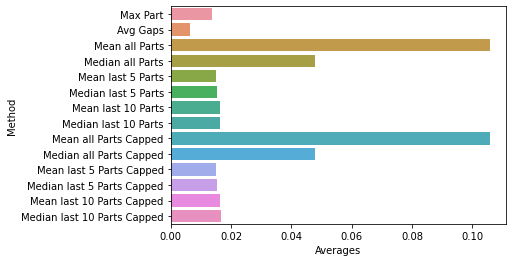

In [18]:
avgs_df['Method'] = avgs_df.index
s = sns.barplot(data=avgs_df, orient='h', y='Method', x='Averages')
plt.show()

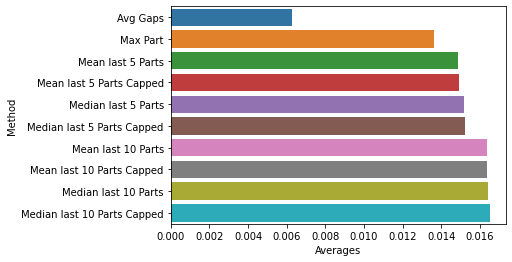

In [22]:
# Remove the 4 worst methods to view the plot better

keep_index = set(avgs_df.index) - set((
    'Mean all Parts', 'Mean all Parts Capped', 'Median all Parts', 'Median all Parts Capped'))
x_df = avgs_df.loc[keep_index]
x_df = x_df.sort_values(['Averages'])
s = sns.barplot(data=x_df, orient='h', y='Method', x='Averages')
plt.show()

## Using a Random Forest

In [29]:
def test_random_forest(train_size, use_gap, ax):
    
    # Generate training & test data. As we assume 100 parts are found, columns 0 to 99 represent the
    # sorted part numbers of the parts found, and column 100 is the target column: the actual number
    # of tanks produced.     
    data = []
    for i in range(train_size + 100_000): 
        num_tanks = random.randint(1_000, 20_000)
        evidence = sorted(random.choices(range(num_tanks), k=100))
        trial_data = evidence + [num_tanks] 
        if use_gap:
            evidence_series = pd.Series(evidence)
            gaps = evidence_series.diff()[1:]
            avg_gap = gaps.mean()        
            trial_data[0] = avg_gap                        
        data.append(trial_data)        
        
    data_df = pd.DataFrame(data)
    print("Generated data")
    
    # Divide into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        data_df.drop(columns=100), 
        data_df[100], 
        train_size=train_size, 
        random_state=42)

    # Train a Random Forest
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    training_err = statistics.median(abs(y_train - y_pred) / y_train)
    print(f"Training Error: {training_err}")

    # Test the Random Forest
    y_pred = rf.predict(X_test)
    testing_err = statistics.median(abs(y_test - y_pred) / y_test)
    print(f"Testing Error: {testing_err}")

    # Notes: with sufficient training data, the random forest learns to rely 100% on the the max part found. 
    feat_importances_df = pd.DataFrame({'Feature': range(100), 'Importance': rf.feature_importances_})
    s = sns.barplot(data=feat_importances_df, orient='h', y='Feature', x='Importance', ax=ax)
    s.set_title(f"Using {train_size} training rows")

Generated data
Training Error: 0.003532586378405633
Testing Error: 0.009996050786731846
Generated data
Training Error: 0.0028678352865884986
Testing Error: 0.007775906363057741
Generated data
Training Error: 0.002360381734332149
Testing Error: 0.006493267922916824
Generated data
Training Error: 0.002336684348983884
Testing Error: 0.006415146879704027


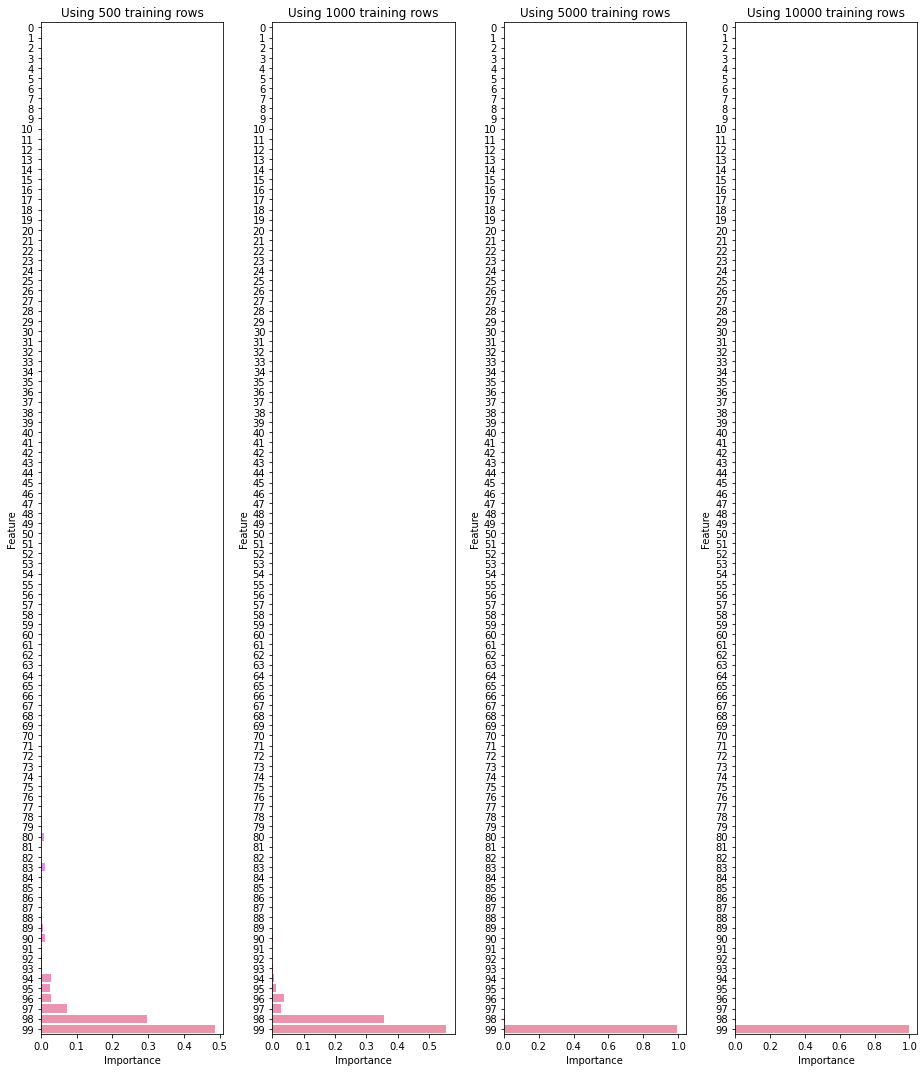

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13, 15))
test_random_forest(500, use_gap=False, ax=ax[0])
test_random_forest(1_000, use_gap=False, ax=ax[1])
test_random_forest(5_000, use_gap=False, ax=ax[2])
test_random_forest(10_000, use_gap=False, ax=ax[3])

plt.tight_layout()
plt.show()

## Using a Random Forest with the Average Gap Feature

Generated data
Training Error: 0.0031379645781648272
Testing Error: 0.009699603699188507
Generated data
Training Error: 0.002788181512178704
Testing Error: 0.007512024817288037
Generated data
Training Error: 0.0024050862983768517
Testing Error: 0.006442245491966118
Generated data
Training Error: 0.002282486629096329
Testing Error: 0.006418687133467752


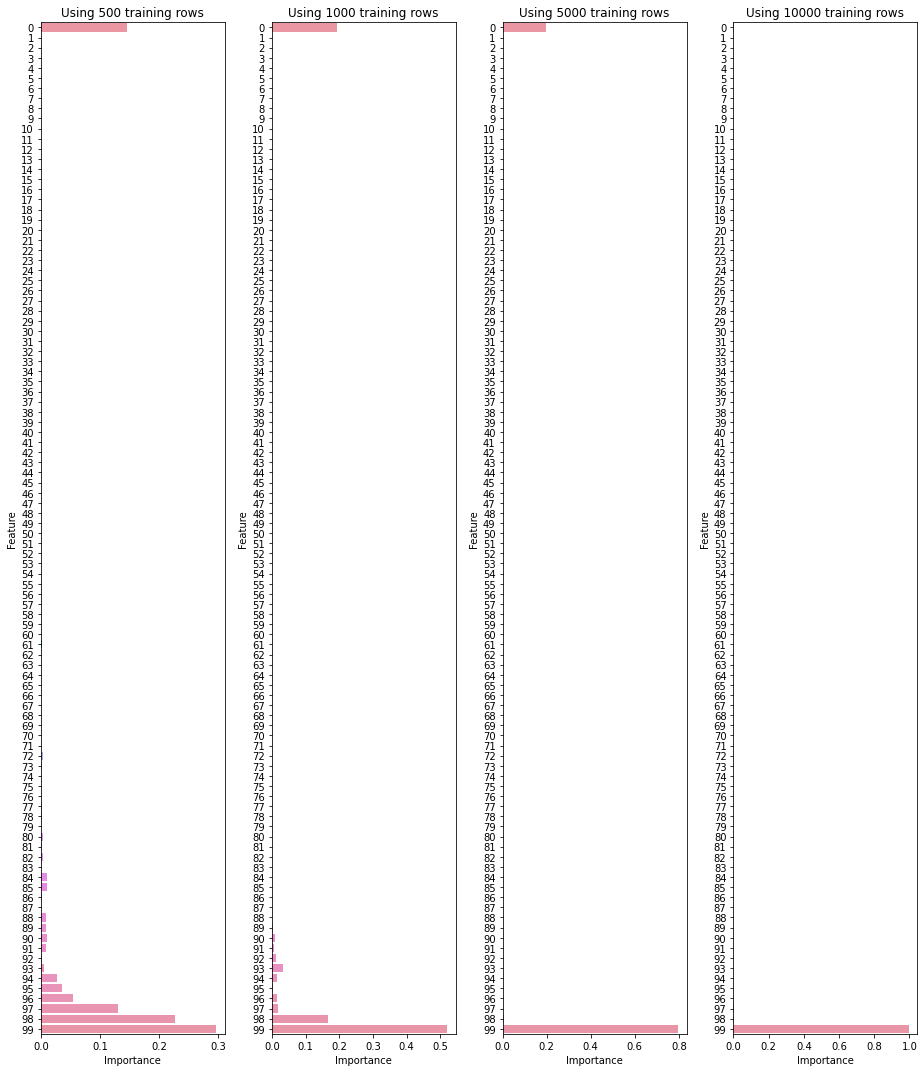

In [31]:
# This test is the same as the previous, but we replace feature 0 (the lowest part number found, the
# least useful feature), with the average gap between parts. We see that with few training rows, this
# feature is used, but with sufficient training rows, as above, the model learns to rely entirely on
# the maximum part number found, though using the average gap would actually be beneficial.

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(13, 15))
test_random_forest(500, use_gap=True, ax=ax[0])
test_random_forest(1_000, use_gap=True, ax=ax[1])
test_random_forest(5_000, use_gap=True, ax=ax[2])
test_random_forest(10_000, use_gap=True, ax=ax[3])

plt.tight_layout()
plt.show()